In [1]:
## Read Data

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import datetime

# Uncomment following to check python version if in doubt
# from platform import python_version
# print(python_version())

## Exploratory Data Analysis


    
# Descriptive Analysis
# deletechars = str.maketrans(dict.fromkeys(string.punctuation))

# d = file.read()
# data = d.translate(deletechars)






# Visualise

# Cleanse & Re-Visualise

# Check max and min

# Highlight features of interest

In [2]:
# Count lines of the file
try:
    file = open('Manhattan12.csv','r')
    line_count = 0
    for line in file:
        line_count += 1
        
    print('file line count:', line_count)
except FileNotFoundError:
    print('File not found.')
except:
    print('File Exception.')


file line count: 27396


In [3]:
# convert an object column with ","s to float 
# (removes commas then converts to float)
def colToType(data, col, newType):
    df[col] = df[col].replace(',','', regex = True)
    oldType = df[col].dtype
    df[col] = df[col].astype(newType)
    print('change',col,'from type', oldType, 'to type', newType)#check change has been made
    return df



In [4]:
# Read file with Pandas - work with dataframe

df = pd.read_csv('Manhattan12.csv', parse_dates=['YEAR BUILT','SALE DATE'])
print('file loaded')
print(df.dtypes)

file loaded
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                         object
COMMERCIAL UNITS                           int64
TOTAL UNITS                               object
LAND SQUARE FEET                          object
GROSS SQUARE FEET                         object
YEAR BUILT                                object
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                object
SALE DAT

In [5]:
df.shape[1]#Number of coloumns

21

In [6]:
# ensure that everything is loaded in the correct dtypes
df = colToType(df,'LAND SQUARE FEET',float)
df = colToType(df,'GROSS SQUARE FEET',float)
df = colToType(df,'TOTAL UNITS', int)
df = colToType(df,'RESIDENTIAL UNITS', int)
df = colToType(df,'TAX CLASS AT TIME OF SALE', object)


change LAND SQUARE FEET from type object to type <class 'float'>
change GROSS SQUARE FEET from type object to type <class 'float'>
change TOTAL UNITS from type object to type <class 'int'>
change RESIDENTIAL UNITS from type object to type <class 'int'>
change TAX CLASS AT TIME OF SALE from type int64 to type <class 'object'>


In [7]:
# Data formatting - Replace empty spaces with NaN
df = df.replace(' ', np.NaN)
df = df.replace('',np.NaN)
df['YEAR BUILT'] = df['YEAR BUILT'].replace('0', np.NaN)
del df['EASE-MENT']#because it is empty

print('some cleaning performed')

some cleaning performed


In [8]:
# Looking at Data Types
print('\n\nDataTypes:')
print(df.dtypes)



DataTypes:
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                object
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                object
SALE DATE                         datetime64[ns]
dtype: 

In [9]:

## More Data Formatting Reqiured - SALE PRICE TO NUMERIC

#CONVERT SALE PRICE TO NUMERIC INSTEAD OF OBJECT - SAVE AS "SALE_PRICE"
#To fix parsing error - ValueError: Unable to parse string "$360,000" at position 0
price_copy = df['SALE PRICE'];
print('price_copy\n',price_copy)
str_prices = price_copy.replace('[\$]','', regex=True)
print('\nremove "$"\n',str_prices)
str_prices = str_prices.replace(',','', regex = True)
print('\nremove ","\n',str_prices)
str_prices = str_prices.replace(regex=r'\b0\b', value=np.NaN)
print('\nremove "0"\n',str_prices)
num_prices = pd.to_numeric(str_prices) 
print('\nprice to numeric\n',num_prices)
df = df.assign(SALE_PRICE=num_prices)


# Create log scaled version of SALE_PRICE
ln_prices = np.log(num_prices)
df = df.assign(LN_PRICE=ln_prices)
df = df.dropna()
print('\nprice after dropna\n', df['SALE PRICE'])
df

price_copy
 0        $2,214,693
1        $1,654,656
2        $1,069,162
3        $1,374,637
4        $1,649,565
            ...    
27390            $0
27391      $495,000
27392            $0
27393            $0
27394            $0
Name: SALE PRICE, Length: 27395, dtype: object

remove "$"
 0        2,214,693
1        1,654,656
2        1,069,162
3        1,374,637
4        1,649,565
           ...    
27390            0
27391      495,000
27392            0
27393            0
27394            0
Name: SALE PRICE, Length: 27395, dtype: object

remove ","
 0        2214693
1        1654656
2        1069162
3        1374637
4        1649565
          ...   
27390          0
27391     495000
27392          0
27393          0
27394          0
Name: SALE PRICE, Length: 27395, dtype: object

remove "0"
 0        2214693
1        1654656
2        1069162
3        1374637
4        1649565
          ...   
27390        NaN
27391     495000
27392        NaN
27393        NaN
27394        NaN
Name:

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LN_PRICE
17,1,ALPHABET CITY,,4,384,1401,RK,229 EAST 2ND STREET,1A,10009,...,1,0.0,0.0,2008,4,RK,"$360,000",2013-06-13,360000.0,12.793859
18,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,66,C0,243 EAST 7TH STREET,,10009,...,3,2381.0,3084.0,1899,1,C0,"$3,150,000",2013-06-03,3150000.0,14.962913
19,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,R6,238 EAST 4TH STREET,-,10009,...,1,0.0,0.0,1955,1,R6,"$3,450,000",2013-03-27,3450000.0,15.053885
21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,C4,715 EAST 5TH STREET,,10009,...,20,2426.0,9345.0,1900,2,C4,"$3,650,000",2012-06-09,3650000.0,15.110238
22,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,C4,274 EAST SEVENTH STREET,,10009,...,13,2726.0,13002.0,1910,2,C4,"$895,250",2012-10-25,895250.0,13.704858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,1,WASHINGTON HEIGHTS UPPER,28 COMMERCIAL CONDOS,4,2180,1228,RG,736 WEST 187 STREET,PRK28,10033,...,1,0.0,0.0,2003,4,R5,"$17,842",2012-10-15,17842.0,9.789311
27380,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-05-30,6000000.0,15.607270
27381,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-01-31,6000000.0,15.607270
27382,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,83,G9,2420 AMSTERDAM AVENUE,,10033,...,1,15000.0,2465.0,1971,4,G9,"$12,000,000",2013-05-30,12000000.0,16.300417


In [10]:
# Looking at Null/Empty Values
sum = pd.isnull(df).sum()
print('\n\ndf isnull sum:')
print(sum)



df isnull sum:
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
SALE_PRICE                        0
LN_PRICE                          0
dtype: int64


In [11]:
# View number of rows of data
shape = df.shape
print ('\n\ndf shape:', shape)



df shape: (16287, 22)


In [12]:
#Drop Duplicate Data
df = df.drop_duplicates()
print(df.shape)

(15726, 22)


In [13]:
# Looking at the Data Description - Descriptive Analysis
def describeDataFull(d):
    print('\n\nData Description (FULL):')
    description = d.describe(include='all')
    index = description.index.tolist()
    index[2] = 'mode'
    index[10] = '50% (median)'
    description.index = index
    return description
def describeData(d):
    print('\n\nData Description:')
    description = d.describe()
    index = description.index.tolist()
    index[5] = '50% (median)'
    description.index = index
    return description
describeDataFull(df)



Data Description (FULL):


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LN_PRICE
count,15726.0,15726,15726,15726,15726.000000,15726.000000,15726,15726,15726,15726.000000,...,15726.000000,15726.000000,15726.000000,15726,15726.000000,15726,15726,15726,1.572600e+04,15726.000000
unique,NaN,38,32,8,NaN,NaN,104,11124,1641,NaN,...,NaN,NaN,NaN,130,NaN,104,4619,287,NaN,NaN
mode,NaN,UPPER EAST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,NaN,NaN,D4,102 WEST 57TH STREET,,NaN,...,NaN,NaN,NaN,2007,NaN,D4,$10,2013-06-27 00:00:00,NaN,NaN
freq,NaN,1766,6895,13074,NaN,NaN,6635,516,10670,NaN,...,NaN,NaN,NaN,1038,NaN,6635,90,192,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-08 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-08 00:00:00,NaN,NaN
mean,1.0,NaN,NaN,NaN,1133.575480,541.408178,NaN,NaN,NaN,10029.807389,...,2.082984,851.643775,7884.870596,NaN,2.170418,NaN,NaN,NaN,2.877860e+06,13.583404
std,0.0,NaN,NaN,NaN,509.127974,803.427934,NaN,NaN,NaN,36.344399,...,13.501859,3919.689320,34687.011374,NaN,0.609061,NaN,NaN,NaN,2.131283e+07,1.660889
min,1.0,NaN,NaN,NaN,11.000000,1.000000,NaN,NaN,NaN,10001.000000,...,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000e+00,0.000000
25%,1.0,NaN,NaN,NaN,822.250000,23.000000,NaN,NaN,NaN,10014.000000,...,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,4.525000e+05,13.022543


In [14]:
describeData(df)



Data Description:


,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE_PRICE,LN_PRICE
count,15726.0,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,1.572600e+04,15726.000000
mean,1.0,1133.575480,541.408178,10029.807389,1.759379,0.302620,2.082984,851.643775,7884.870596,2.170418,2.877860e+06,13.583404
std,0.0,509.127974,803.427934,36.344399,13.141276,2.491612,13.501859,3919.689320,34687.011374,0.609061,2.131283e+07,1.660889
min,1.0,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000
25%,1.0,822.250000,23.000000,10014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.525000e+05,13.022543
50% (median),1.0,1170.000000,49.000000,10022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.009130e+05,13.593507
75%,1.0,1460.000000,1101.000000,10028.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.725000e+06,14.360738
max,1.0,2250.000000,9008.000000,10463.000000,904.000000,150.000000,904.000000,213650.000000,940000.000000,4.000000,1.307965e+09,20.991738


In [15]:
#Drop NaN values from rows
df = df.dropna(axis=0)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LN_PRICE
17,1,ALPHABET CITY,,4,384,1401,RK,229 EAST 2ND STREET,1A,10009,...,1,0.0,0.0,2008,4,RK,"$360,000",2013-06-13,360000.0,12.793859
18,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,66,C0,243 EAST 7TH STREET,,10009,...,3,2381.0,3084.0,1899,1,C0,"$3,150,000",2013-06-03,3150000.0,14.962913
19,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,R6,238 EAST 4TH STREET,-,10009,...,1,0.0,0.0,1955,1,R6,"$3,450,000",2013-03-27,3450000.0,15.053885
21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,C4,715 EAST 5TH STREET,,10009,...,20,2426.0,9345.0,1900,2,C4,"$3,650,000",2012-06-09,3650000.0,15.110238
22,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,C4,274 EAST SEVENTH STREET,,10009,...,13,2726.0,13002.0,1910,2,C4,"$895,250",2012-10-25,895250.0,13.704858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,1,WASHINGTON HEIGHTS UPPER,28 COMMERCIAL CONDOS,4,2180,1228,RG,736 WEST 187 STREET,PRK28,10033,...,1,0.0,0.0,2003,4,R5,"$17,842",2012-10-15,17842.0,9.789311
27380,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-05-30,6000000.0,15.607270
27381,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-01-31,6000000.0,15.607270
27382,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,83,G9,2420 AMSTERDAM AVENUE,,10033,...,1,15000.0,2465.0,1971,4,G9,"$12,000,000",2013-05-30,12000000.0,16.300417


In [16]:
df.describe(include=[np.number])

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE_PRICE,LN_PRICE
count,15726.0,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,1.572600e+04,15726.000000
mean,1.0,1133.575480,541.408178,10029.807389,1.759379,0.302620,2.082984,851.643775,7884.870596,2.170418,2.877860e+06,13.583404
std,0.0,509.127974,803.427934,36.344399,13.141276,2.491612,13.501859,3919.689320,34687.011374,0.609061,2.131283e+07,1.660889
min,1.0,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000
25%,1.0,822.250000,23.000000,10014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.525000e+05,13.022543
50%,1.0,1170.000000,49.000000,10022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.009130e+05,13.593507
75%,1.0,1460.000000,1101.000000,10028.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.725000e+06,14.360738
max,1.0,2250.000000,9008.000000,10463.000000,904.000000,150.000000,904.000000,213650.000000,940000.000000,4.000000,1.307965e+09,20.991738


In [17]:
# Looking at data
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LN_PRICE
17,1,ALPHABET CITY,,4,384,1401,RK,229 EAST 2ND STREET,1A,10009,...,1,0.0,0.0,2008,4,RK,"$360,000",2013-06-13,360000.0,12.793859
18,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,66,C0,243 EAST 7TH STREET,,10009,...,3,2381.0,3084.0,1899,1,C0,"$3,150,000",2013-06-03,3150000.0,14.962913
19,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,R6,238 EAST 4TH STREET,-,10009,...,1,0.0,0.0,1955,1,R6,"$3,450,000",2013-03-27,3450000.0,15.053885
21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,C4,715 EAST 5TH STREET,,10009,...,20,2426.0,9345.0,1900,2,C4,"$3,650,000",2012-06-09,3650000.0,15.110238
22,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,C4,274 EAST SEVENTH STREET,,10009,...,13,2726.0,13002.0,1910,2,C4,"$895,250",2012-10-25,895250.0,13.704858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,1,WASHINGTON HEIGHTS UPPER,28 COMMERCIAL CONDOS,4,2180,1228,RG,736 WEST 187 STREET,PRK28,10033,...,1,0.0,0.0,2003,4,R5,"$17,842",2012-10-15,17842.0,9.789311
27380,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-05-30,6000000.0,15.607270
27381,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-01-31,6000000.0,15.607270
27382,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,83,G9,2420 AMSTERDAM AVENUE,,10033,...,1,15000.0,2465.0,1971,4,G9,"$12,000,000",2013-05-30,12000000.0,16.300417


In [18]:
def plotstats(data, col, y_label,bins =30, alpha=0.7):

#     setting size of figure
    fig = plt.figure(1)
    fig.set_size_inches(12,8)
    
#   box plot - note by default pandas boxplot whiskers are Q1 and Q3...
#   not max and min values
    plt.subplot(2,1,1)
    data.dropna().boxplot(col,vert=False)
    
    ## The historgram
    plt.subplot(2,1,2)
    temp = data[col].values
    plt.hist(temp, bins = bins, alpha = alpha)
    plt.ylabel(y_label)
    plt.xlabel(col)
    plt.show()
    min_val = data[col].min()
    max_val = data[col].max()
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(data.shape[0])
    print('MIN', min_val)
    print('MAX', max_val)
    print('Q1',Q1)#first whisker value
    print('Q3',Q3)#second whisker value
    print('IQR', IQR)
    return (Q1,Q3,IQR)

def plotstats_reverse(data, col, y_label, bins=30, alpha=0.7):
#     setting size of figure
    fig = plt.figure(1)
    fig.set_size_inches(12,8)
    
#   box plot - note by default pandas boxplot whiskers are Q1 and Q3...
#   not max and min values
    plt.subplot(2,1,1)
    data.dropna().boxplot(col,vert=False)
    
    ## The historgram
    plt.subplot(2,1,2)
    temp = data[y_label].values
    plt.hist(temp, bins = bins, alpha = alpha)
    plt.ylabel(col)
    plt.xlabel(y_label)
    plt.show()
    min_val = data[y_label].min()
    max_val = data[y_label].max()
    Q1 = data[y_label].quantile(0.25)
    Q3 = data[y_label].quantile(0.75)
    IQR = Q3 - Q1
    print('Data cells:', data.shape[0])
    print('MIN:', data[y_label].min())
    print('MAX:', data[y_label].max())
    print('Q1:',Q1)#first whisker value
    print('Q3:',Q3)#second whisker value
    print('IQR:', IQR)
    return (Q1,Q3,IQR)

In [19]:
print('MAX',df['LAND SQUARE FEET'].max())
print('MIN',df['LAND SQUARE FEET'].min())

MAX 213650.0
MIN 0.0


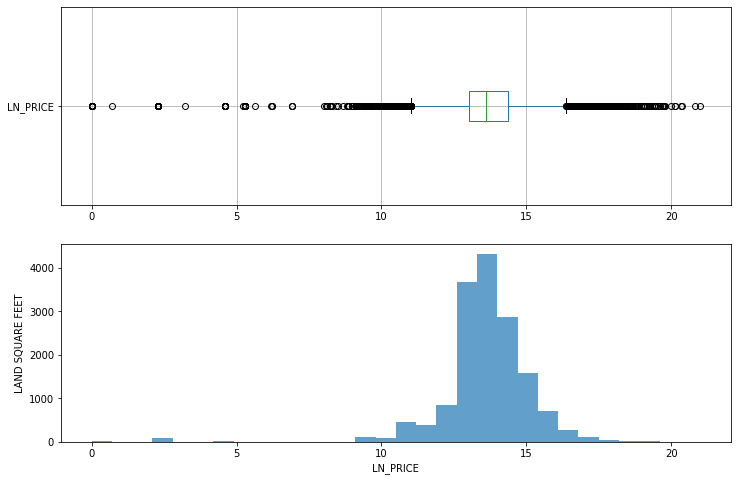

15726
MIN 0.0
MAX 20.99173836944094
Q1 13.022543042122118
Q3 14.360737608447597
IQR 1.3381945663254786


In [20]:
# Spotting outliers - Graph plotting - BoxPlot and Histogram of price to square feet
Q1, Q3, IQR = plotstats(df,'LN_PRICE', 'LAND SQUARE FEET',30,0.7)

In [21]:
# DataTypes:
# BOROUGH                                    int64
# NEIGHBORHOOD                              object
# BUILDING CLASS CATEGORY                   object
# TAX CLASS AT PRESENT                      object
# BLOCK                                      int64
# LOT                                        int64
# BUILDING CLASS AT PRESENT                 object
# ADDRESS                                   object
# APARTMENT NUMBER                          object
# ZIP CODE                                   int64
# RESIDENTIAL UNITS                         object
# COMMERCIAL UNITS                           int64
# TOTAL UNITS                              float64
# LAND SQUARE FEET                         float64
# GROSS SQUARE FEET                        float64
# YEAR BUILT                                object
# TAX CLASS AT TIME OF SALE                  int64
# BUILDING CLASS AT TIME OF SALE            object
# SALE PRICE                                object
# SALE DATE                         datetime64[ns]
# dtype: object


# DataTypes:
# Data that should not be treated as a regular numeric value - not scaled
# i.e. Bough is and int but representes and object type/category type
numeric_non_scaled = ['BOROUGH','BLOCK','LOT','ZIP CODE', 'YEAR BUILT','LN_PRICE']#every other numeric will be scaled
non_numeric = ['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE',
               'BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE','ADDRESS','APARTMENT NUMBER','SALE DATE']

In [22]:
# Identify and Remove Outliers
def id_outliers(data,col):
    temp = np.zeros(data.shape[0])
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    for i, x in enumerate(data[col]):
        if (x < Q1 - (IQR*1.5) or x > Q3 + (IQR*1.5) ): temp[i] = 1
    
    data['outliers'] = temp
    return data

def remove_outliers(data,col):
    data = id_outliers(data,col)
    data = data[data.outliers == 0] #only copies row where outliers == 0 - filters
    del data['outliers']
#     data.drop('outliers',axis = 1, inplace = True)#drop outlier columns
    
    data.to_csv('cleaned_data.csv',index=False,)#uncomment only to crate new copy
    return data

# for col in df.columns.difference(numeric_non_scaled):
#     if (df[col].dtype in [np.int64, np.int32, np.float64]):
#         df = remove_outliers(df, col)

# Already performed - so commented out
df = remove_outliers(df,'LN_PRICE')
df = remove_outliers(df, 'SALE_PRICE')
        


/Users/zacharyishmael/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [23]:
# Scaling Data - Data Normalisation
# exclude = ['LN_PRICE'] // in this case
def scaleData(dataln, exclude):
    print('dataln.shape[1]', dataln.shape[1])
    print('cols', dataln.columns.values.tolist())
    data = dataln[dataln.columns.difference(exclude)]
    cols = data.columns.values.tolist()
    num_cols = []
    print('numcols:', num_cols)
    for col in cols:
        if (data[col].dtype in [np.int64, np.int32, np.float64]):
            num_cols.append(col)
    print('numcols:', num_cols)        
    data_norm = (data[num_cols] - data[num_cols].min())/(data[num_cols].max() - data[num_cols].min())
    for col in exclude:
        data_norm[col] = dataln[col]
    for col in non_numeric:
        data_norm[col] = dataln[col]#add columns that were non_numeric back
        print('data_shape:', data_norm.shape[1])
    return data_norm
data_cleaned = pd.read_csv('cleaned_data.csv')
data_scaled = scaleData(data_cleaned,numeric_non_scaled)
data_scaled.to_csv('data_scaled.csv',index=False)

dataln.shape[1] 22
cols ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE', 'SALE_PRICE', 'LN_PRICE']
numcols: []
numcols: ['COMMERCIAL UNITS', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 'SALE_PRICE', 'TAX CLASS AT TIME OF SALE', 'TOTAL UNITS']
data_shape: 14
data_shape: 15
data_shape: 16
data_shape: 16
data_shape: 17
data_shape: 18
data_shape: 19
data_shape: 20
data_shape: 21


In [24]:
print(data_scaled.dtypes)

COMMERCIAL UNITS                  float64
GROSS SQUARE FEET                 float64
LAND SQUARE FEET                  float64
RESIDENTIAL UNITS                 float64
SALE_PRICE                        float64
TAX CLASS AT TIME OF SALE           int64
TOTAL UNITS                       float64
BOROUGH                             int64
BLOCK                               int64
LOT                                 int64
ZIP CODE                            int64
YEAR BUILT                          int64
LN_PRICE                          float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BUILDING CLASS AT PRESENT          object
BUILDING CLASS AT TIME OF SALE     object
ADDRESS                            object
APARTMENT NUMBER                   object
SALE DATE                          object
dtype: object


In [25]:
data_scaled.shape[1]

21

In [26]:
data_scaled.describe()

,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,SALE_PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,BOROUGH,BLOCK,LOT,ZIP CODE,YEAR BUILT,LN_PRICE
count,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.0,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000
mean,0.001523,0.009310,0.007085,0.002157,0.271970,2.076113,0.002463,1.0,1143.895287,560.949969,10030.364246,1951.476891,13.529539
std,0.015624,0.052907,0.034877,0.013253,0.217663,0.425705,0.013652,0.0,514.256720,816.634580,37.903537,33.778206,0.778277
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,11.000000,1.000000,10001.000000,1846.000000,11.018629
25%,0.000000,0.000000,0.000000,0.000000,0.117825,2.000000,0.000000,1.0,838.000000,23.000000,10014.000000,1925.000000,13.047640
50%,0.000000,0.000000,0.000000,0.000000,0.198519,2.000000,0.000000,1.0,1196.000000,51.000000,10022.000000,1955.000000,13.514405
75%,0.000000,0.000000,0.000000,0.002994,0.369555,2.000000,0.002994,1.0,1483.000000,1102.000000,10028.000000,1977.000000,14.096923
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0,2250.000000,9008.000000,10463.000000,2013.000000,15.062925


In [27]:
data_scaled.describe(include=[np.number])

,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,SALE_PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,BOROUGH,BLOCK,LOT,ZIP CODE,YEAR BUILT,LN_PRICE
count,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.0,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000
mean,0.001523,0.009310,0.007085,0.002157,0.271970,2.076113,0.002463,1.0,1143.895287,560.949969,10030.364246,1951.476891,13.529539
std,0.015624,0.052907,0.034877,0.013253,0.217663,0.425705,0.013652,0.0,514.256720,816.634580,37.903537,33.778206,0.778277
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,11.000000,1.000000,10001.000000,1846.000000,11.018629
25%,0.000000,0.000000,0.000000,0.000000,0.117825,2.000000,0.000000,1.0,838.000000,23.000000,10014.000000,1925.000000,13.047640
50%,0.000000,0.000000,0.000000,0.000000,0.198519,2.000000,0.000000,1.0,1196.000000,51.000000,10022.000000,1955.000000,13.514405
75%,0.000000,0.000000,0.000000,0.002994,0.369555,2.000000,0.002994,1.0,1483.000000,1102.000000,10028.000000,1977.000000,14.096923
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0,2250.000000,9008.000000,10463.000000,2013.000000,15.062925


In [28]:
def scatter_plot(data,data_norm,x,y,title1,title2):
    f , ax = plt.subplots(2)
    data.plot.scatter(x=x,y=y,ax=ax[0], title=title1)
    data_norm.plot.scatter(x=x,y=y,ax=ax[1],title=title2)
    f.subplots_adjust(hspace=1)
    plt.show()

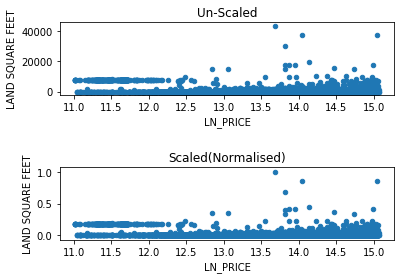

In [29]:
x = 'LN_PRICE'
y = 'LAND SQUARE FEET'
title1 = 'Un-Scaled'
title2 = 'Scaled(Normalised)'
scatter_plot(data_cleaned, data_scaled,x,y,title1,title2)

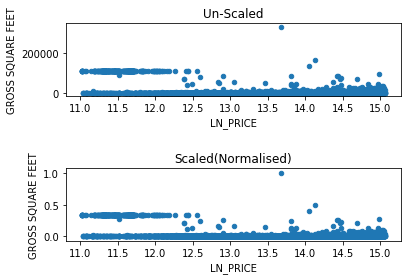

In [30]:
x = 'LN_PRICE'
y = 'GROSS SQUARE FEET'
title1 = 'Un-Scaled'
title2 = 'Scaled(Normalised)'
scatter_plot(data_cleaned, data_scaled,x,y,title1,title2)

In [31]:
data_scaled

,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,SALE_PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,BOROUGH,BLOCK,LOT,...,YEAR BUILT,LN_PRICE,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,ADDRESS,APARTMENT NUMBER,SALE DATE
0,0.000000,0.000000,0.000000,0.000000,0.087418,4,0.002994,1,384,1401,...,2008,12.793859,ALPHABET CITY,,4,RK,RK,229 EAST 2ND STREET,1A,2013-06-13
1,0.000000,0.009164,0.054736,0.008982,0.903129,1,0.008982,1,377,66,...,1899,14.962913,ALPHABET CITY,03 THREE FAMILY HOMES,1,C0,C0,243 EAST 7TH STREET,,2013-06-03
2,0.000000,0.000000,0.000000,0.002994,0.990840,1,0.002994,1,399,1102,...,1955,15.053885,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,R6,R6,238 EAST 4TH STREET,-,2013-03-27
3,0.000000,0.038634,0.062667,0.038922,0.243909,2,0.038922,1,376,30,...,1910,13.704858,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C4,C4,274 EAST SEVENTH STREET,,2012-10-25
4,0.000000,0.000000,0.000000,0.000000,0.085957,2,0.000000,1,373,49,...,1920,12.779873,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,C6,"311 EAST 3RD STREET, 31",,2012-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13107,0.000000,0.000000,0.000000,0.002994,0.154663,2,0.002994,1,2180,1274,...,2003,13.287878,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,R4,R4,736 WEST 187 STREET,601,2012-10-15
13108,0.000000,0.000000,0.000000,0.002994,0.134198,2,0.002994,1,2180,1281,...,2003,13.161584,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,R4,R4,736 WEST 187TH STREET,608,2013-06-19
13109,0.016667,0.020280,0.059195,0.000000,0.959555,4,0.002994,1,2176,137,...,1941,15.022378,WASHINGTON HEIGHTS UPPER,21 OFFICE BUILDINGS,4,O6,O6,4249 BROADWAY,,2013-04-15
13110,0.066667,0.014830,0.103172,0.000000,0.727708,4,0.011976,1,2158,65,...,1960,14.751604,WASHINGTON HEIGHTS UPPER,22 STORE BUILDINGS,4,K1,K1,1588 ST NICHOLAS AVENUE,,2012-09-11


In [32]:
# Separate Data Into Training data(80%) and Testing Data(20%)
from sklearn.utils import shuffle
print('total no. cells=',data_scaled.shape[0])

twenty_percent = round(data_scaled.shape[0]*20/100)
print('twenty_percent=', twenty_percent,'cells')

train_data_cells = data_scaled.shape[0] - twenty_percent
print('train_cells= 1 to',train_data_cells)
print('test_cells=', train_data_cells+1, 'to', data_scaled.shape[0])
data_scaled = shuffle(data_scaled)#must use dropna or else won't work
train_data = data_scaled[:train_data_cells]
test_data = data_scaled[train_data_cells+1:]

total no. cells= 13112
twenty_percent= 2622 cells
train_cells= 1 to 10490
test_cells= 10491 to 13112


In [33]:
train_data

,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,SALE_PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,BOROUGH,BLOCK,LOT,...,YEAR BUILT,LN_PRICE,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,ADDRESS,APARTMENT NUMBER,SALE DATE
12911,0.000000,0.00000,0.000000,0.000000,0.161973,2,0.000000,1,2177,170,...,1923,13.329378,WASHINGTON HEIGHTS UPPER,10 COOPS - ELEVATOR APARTMENTS,2,D4,D4,"870 W 181ST STREET, 69",,2012-11-20
12444,0.000000,0.00000,0.000000,0.000000,0.303772,2,0.000000,1,1869,1,...,1926,13.910821,UPPER WEST SIDE (96-116),10 COOPS - ELEVATOR APARTMENTS,2,D4,D4,"760 WEST END AVENUE, 5D",,2012-10-24
9892,0.000000,0.00000,0.000000,0.000000,0.235942,2,0.000000,1,1533,22,...,1966,13.673947,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,D4,D4,"1681 2 AVENUE, 8B",,2013-01-28
3684,0.016667,0.01034,0.031264,0.000000,0.289153,4,0.002994,1,2041,129,...,1910,13.864301,HARLEM-CENTRAL,37 RELIGIOUS FACILITIES,4,M9,M9,68 EDGECOMBE AVENUE,,2013-06-25
12741,0.000000,0.00000,0.000000,0.000000,0.135659,2,0.000000,1,1874,1002,...,1910,13.171154,UPPER WEST SIDE (96-116),17 CONDOPS,2,R9,R9,"235 WEST 102ND STREET, 16-J",,2012-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.000000,0.00000,0.000000,0.002994,0.023097,2,0.002994,1,277,1033,...,1989,11.849398,CHINATOWN,13 CONDOS - ELEVATOR APARTMENTS,2,R4,R4,60 HENRY STREET,3E,2012-10-12
11574,0.000000,0.00000,0.000000,0.000000,0.211675,2,0.000000,1,1170,1010,...,1975,13.573439,UPPER WEST SIDE (59-79),17 CONDOPS,2,R9,R9,"200 WEST 79TH STREET, 12E",,2013-11-02
7432,0.000000,0.00000,0.000000,0.002994,0.713089,2,0.002994,1,594,1729,...,2005,14.731801,SOHO,13 CONDOS - ELEVATOR APARTMENTS,2,R4,R4,255 HUDSON STREET,6A,2013-06-19
3221,0.000000,0.00000,0.000000,0.000000,0.524350,4,0.002994,1,1917,1101,...,2005,14.433099,HARLEM-CENTRAL,,4,RB,RB,2257 ADAM C POWELL BLVD,COM,2013-01-22


In [34]:
# describe training data
describeData(train_data)



Data Description:


,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,SALE_PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,BOROUGH,BLOCK,LOT,ZIP CODE,YEAR BUILT,LN_PRICE
count,10490.000000,10490.000000,10490.000000,10490.000000,10490.000000,10490.000000,10490.000000,10490.0,10490.000000,10490.000000,10490.000000,10490.000000,10490.000000
mean,0.001624,0.009406,0.006969,0.002066,0.272531,2.077216,0.002389,1.0,1145.504004,562.531077,10030.389990,1951.579409,13.530319
std,0.017187,0.052769,0.032549,0.009799,0.218349,0.426218,0.010445,0.0,514.107700,818.815805,37.824206,33.750457,0.780455
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,11.000000,1.000000,10001.000000,1850.000000,11.018629
25%,0.000000,0.000000,0.000000,0.000000,0.118117,2.000000,0.000000,1.0,838.000000,23.000000,10014.000000,1925.000000,13.049793
50% (median),0.000000,0.000000,0.000000,0.000000,0.199981,2.000000,0.000000,1.0,1198.500000,52.000000,10022.000000,1955.000000,13.521139
75%,0.000000,0.000000,0.000000,0.002994,0.369555,2.000000,0.002994,1.0,1483.000000,1102.000000,10028.000000,1977.000000,14.096923
max,1.000000,0.497835,0.857586,0.562874,1.000000,4.000000,0.583832,1.0,2250.000000,9008.000000,10463.000000,2013.000000,15.062925


In [35]:
# View Mean of training data by NEIGHBORHOOD

train_data.groupby('NEIGHBORHOOD').mean()

,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,SALE_PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,BOROUGH,BLOCK,LOT,ZIP CODE,YEAR BUILT,LN_PRICE
NEIGHBORHOOD,,,,,,,,,,,,,
ALPHABET CITY,0.001515,0.001915,0.006283,0.001742,0.221455,2.109091,0.002069,1.0,389.563636,274.981818,10008.745455,1924.127273,13.316492
CHELSEA,0.002461,0.001948,0.002007,0.001630,0.299510,2.029536,0.002078,1.0,758.860759,667.080169,10009.502110,1950.611814,13.660307
CHINATOWN,0.006250,0.005373,0.010313,0.005520,0.363396,2.593750,0.007204,1.0,214.062500,1020.250000,10013.375000,1953.750000,13.841509
CIVIC CENTER,0.000442,0.000000,0.000000,0.002305,0.440351,2.035398,0.002438,1.0,145.964602,1005.566372,10010.982301,1978.796460,14.110688
CLINTON,0.000716,0.000400,0.001131,0.002186,0.267252,2.079755,0.002333,1.0,1069.036810,767.472393,10026.717791,1970.674847,13.484197
EAST VILLAGE,0.000877,0.000747,0.002323,0.002332,0.256994,1.989474,0.002490,1.0,452.473684,435.084211,10004.452632,1930.336842,13.526728
FASHION,0.004891,0.004632,0.005359,0.002278,0.441155,2.195652,0.003287,1.0,818.184783,803.750000,10012.641304,1972.097826,14.043255
FINANCIAL,0.000442,0.000182,0.000305,0.002915,0.274626,2.006623,0.002994,1.0,47.930464,1187.188742,10016.463576,1961.288079,13.713925
FLATIRON,0.000090,0.000133,0.000299,0.001642,0.338936,2.053763,0.001738,1.0,836.247312,662.129032,10009.521505,1945.639785,13.830704


In [36]:
#checking for missing values
pd.isnull(train_data).values.sum()

0

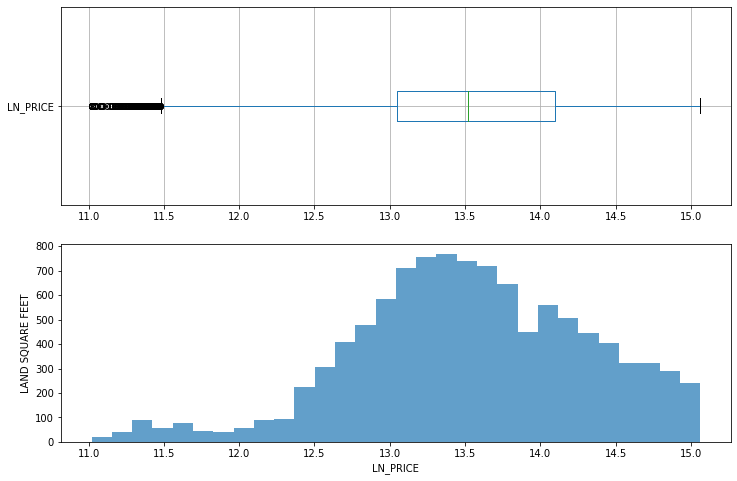

10490
MIN 11.018629143155449
MAX 15.062924962645035
Q1 13.049792684569493
Q3 14.09692301740246
IQR 1.0471303328329675


(13.049792684569493, 14.09692301740246, 1.0471303328329675)

In [37]:


plotstats(train_data,'LN_PRICE', 'LAND SQUARE FEET')


# seems to give a fairly normal distribution with some outliers.

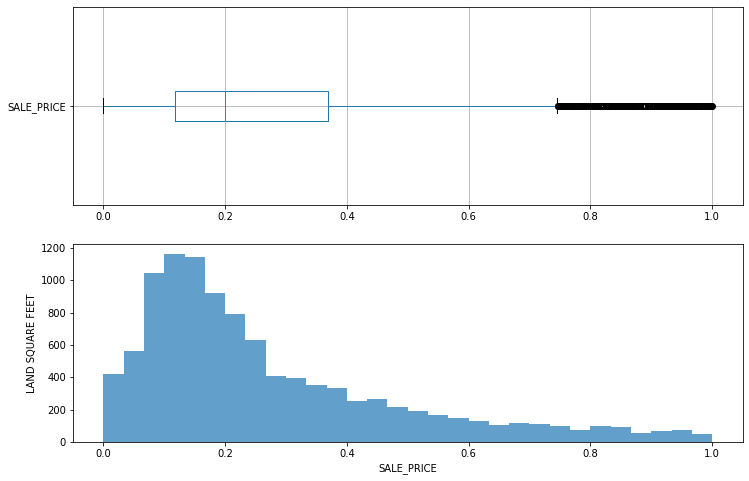

10490
MIN 0.0
MAX 1.0
Q1 0.1181172576915093
Q3 0.36955498446056373
IQR 0.2514377267690544


(0.1181172576915093, 0.36955498446056373, 0.2514377267690544)

In [38]:
# SALE PRICE VS LAND SQUARE FEET - SCALED
plotstats(train_data,'SALE_PRICE', 'LAND SQUARE FEET')

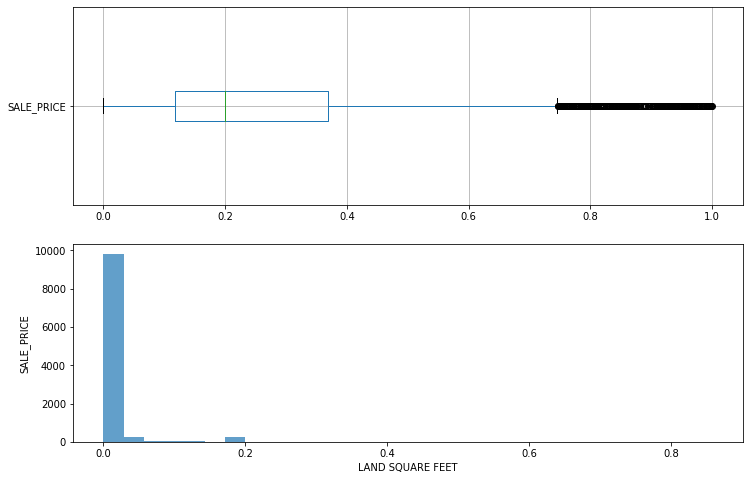

Data cells: 10490
MIN: 0.0
MAX: 0.8575862068965517
Q1: 0.0
Q3: 0.0
IQR: 0.0


(0.0, 0.0, 0.0)

In [39]:
plotstats_reverse(train_data,'SALE_PRICE', 'LAND SQUARE FEET',30,0.7)

In [40]:
def hist(title, x, y):
    fig2 = plt.figure(2, figsize = (20,10))
    a = fig2.gca()
    a.set_title(title, fontsize=20 )
    a.set_ylabel(y,fontsize=20)
    a.set_xlabel(x,fontsize=20)
    chart = train_data.groupby(x)[y].mean()
    chart.plot.bar()

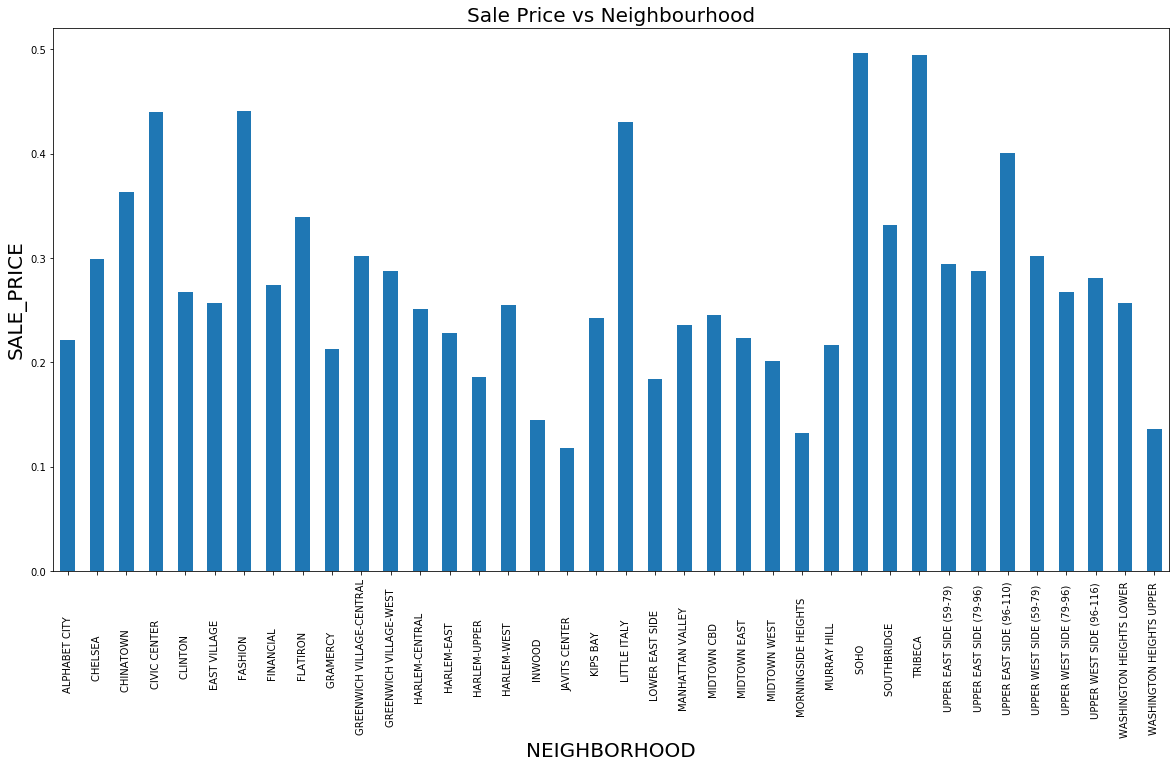

In [41]:
# Average Sale Price By Neighbourhood
hist('Sale Price vs Neighbourhood', 'NEIGHBORHOOD','SALE_PRICE')

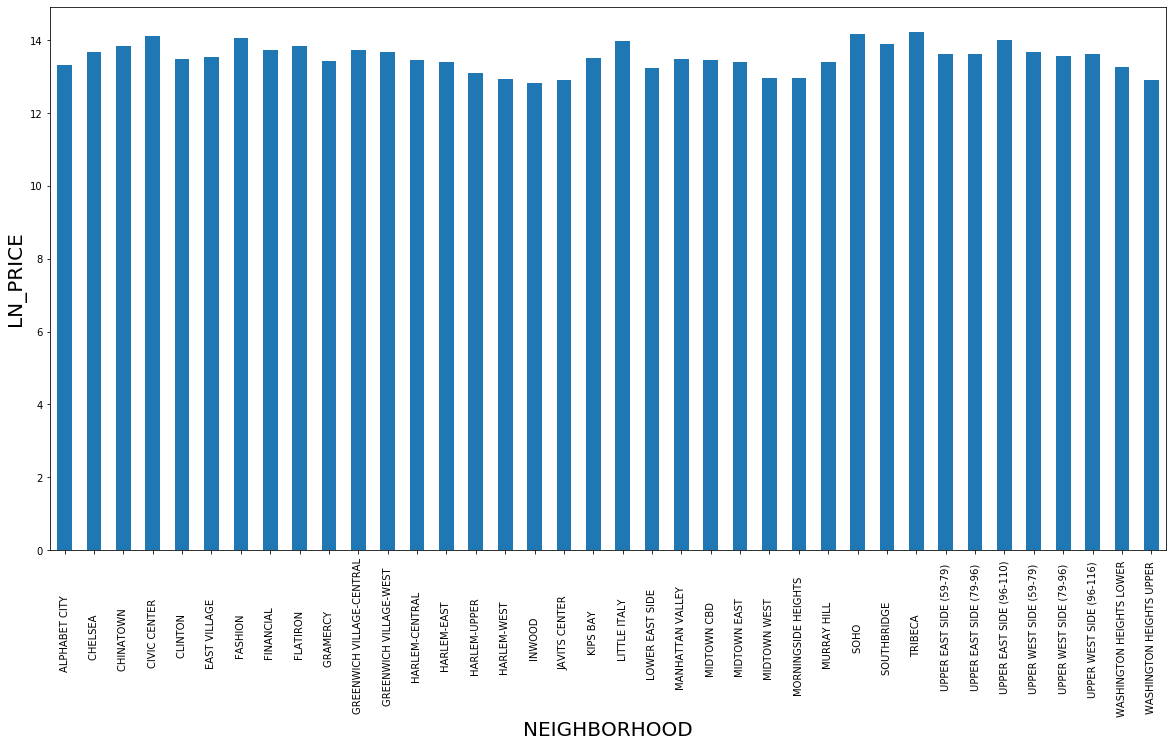

In [42]:
hist('', 'NEIGHBORHOOD', 'LN_PRICE')

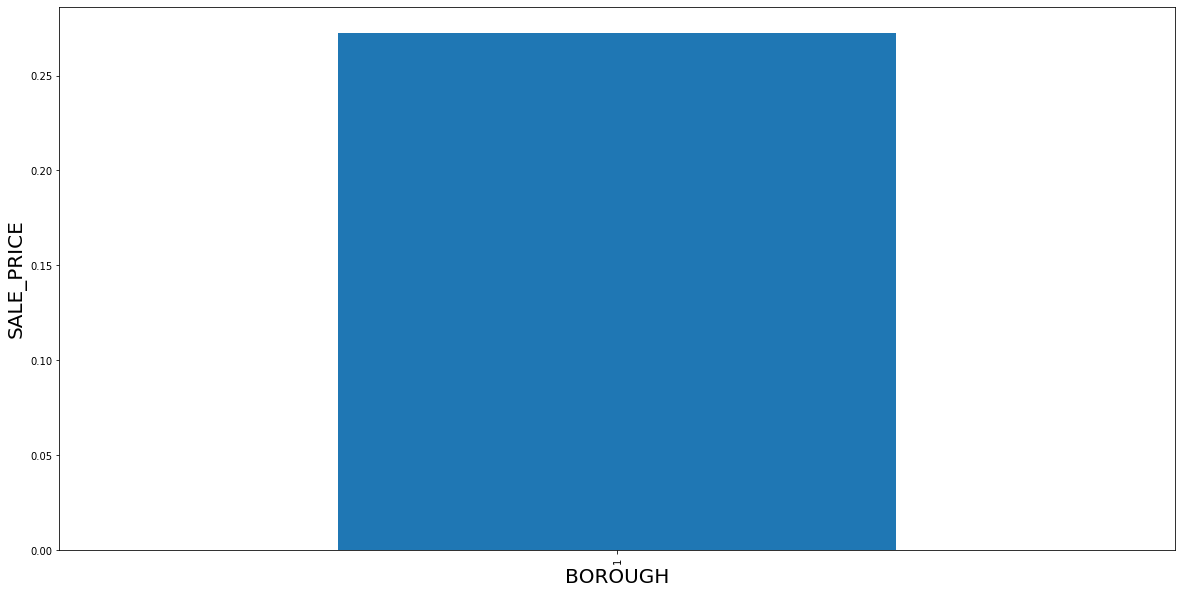

In [43]:
# SALE PRICE dependent on BOROUGH
hist('', 'BOROUGH', 'SALE_PRICE')
# chart2 = train_data.groupby('BOROUGH')['SALE_PRICE'].mean()
# chart2.plot.bar()
# means that all the data is from the same boughrough, this mean that price must be
# affected by town and not borouhg in this instance

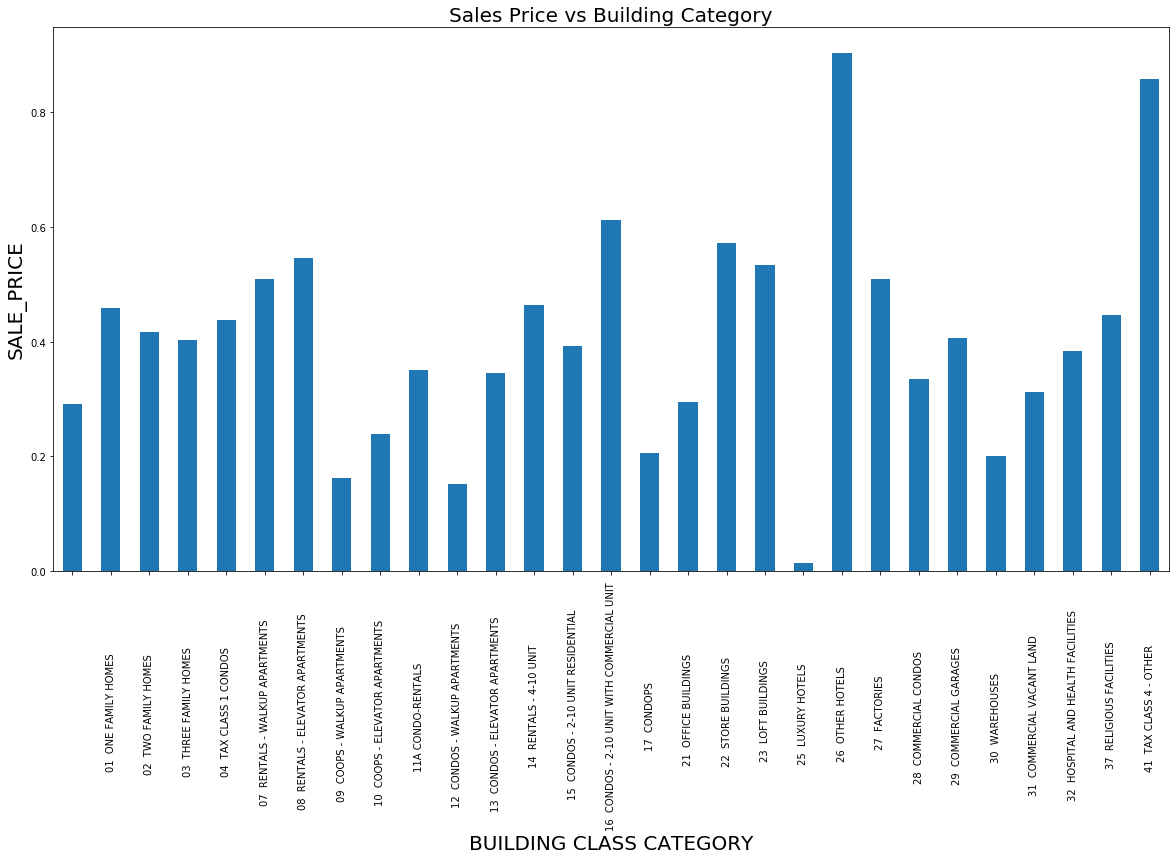

In [44]:
# SALE PRICE by building class category - Relative Frequency Histogram
hist('Sales Price vs Building Category', 'BUILDING CLASS CATEGORY', 'SALE_PRICE')

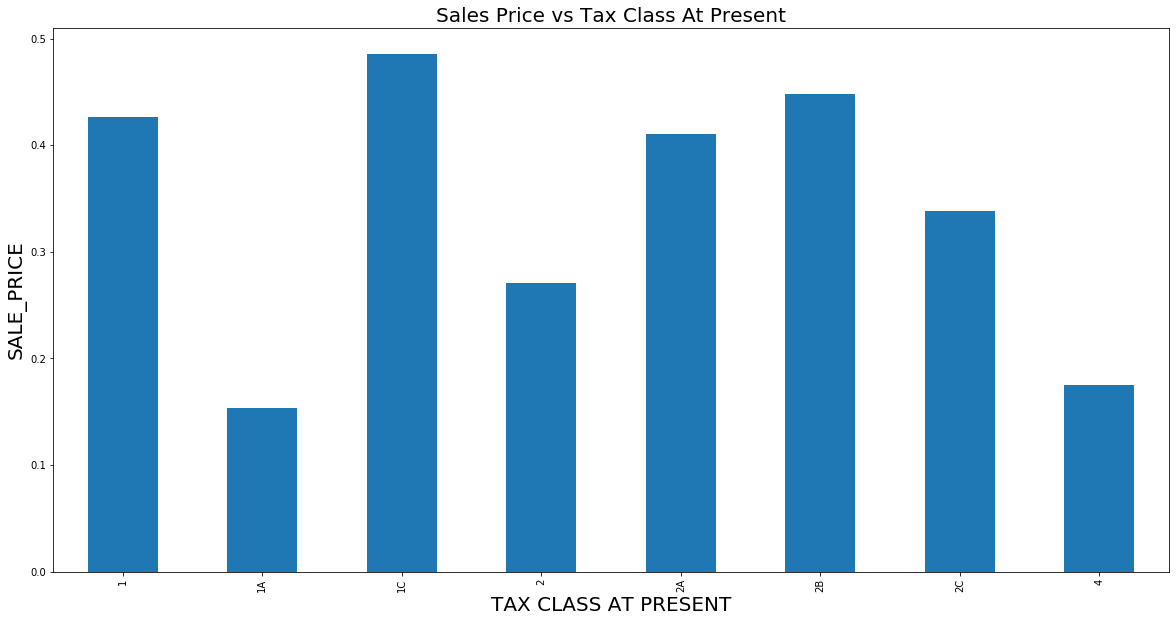

In [45]:
# Sales Price Dependent Upon Tax Class
hist('Sales Price vs Tax Class At Present', 'TAX CLASS AT PRESENT', 'SALE_PRICE')

In [46]:
import pandas as pd
import numpy as np
from sklearn import svm, feature_selection, linear_model
print('start')
data_scaled = pd.read_csv('data_scaled.csv')
df_copy = data_scaled.select_dtypes(include=[np.number]).copy()
features = df_copy.columns.values.tolist()
del df_copy['SALE_PRICE']
features.remove('SALE_PRICE')
features.remove('LN_PRICE')
print(features)
X = df_copy[features]
Y = df_copy['LN_PRICE']
print('here')
estimator = svm.SVR(kernel='linear',verbose=True,max_iter=100)
print('here2')
selector = feature_selection.RFE(estimator,5, step=1)
print('here3')
selector = selector.fit(X,Y)
print('here4')
select_features = np.array(features)[selector.ranking_ == 1].tolist()
print('here5')
print(select_features)
print('finished')

start
['COMMERCIAL UNITS', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 'TAX CLASS AT TIME OF SALE', 'TOTAL UNITS', 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT']
here
here2
here3
[LibSVM][LibSVM][LibSVM]

/Users/zacharyishmael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/zacharyishmael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/zacharyishmael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/zacharyishmael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[LibSVM][LibSVM][LibSVM][LibSVM]here4
here5
['LAND SQUARE FEET', 'TAX CLASS AT TIME OF SALE', 'LOT', 'ZIP CODE', 'YEAR BUILT']
finished


/Users/zacharyishmael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/zacharyishmael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [48]:
X = df_copy[select_features]
Y = df['LN_PRICE']
trainX, testX, traintY, testY = train_test_split(X,Y, test_size=0.2)

ln_model = linear_model.LinearRegression()
ln_model.fit(traintX, traintY)
print('Y-axis intercept {:6.4f}'.format(lm.intercept_))
print('Weight coefficeints:')
# Print module equations
for feature, coef in zip(select_features, lm.coef_):
    print("{:>20}: {:6.4f}".format(feature, coef))
#Print R-Squared values    
print('R square for the training data is {:4.3f}'.format(lm.score(trainX,trainY)))
print('Score against test data: {:4.3f}'.format(lm.score(testX, testY)))

NameError: name 'train_test_split' is not defined

In [ ]:
# Scatter Plot Matrix

def scatter_plot_matrix(cols, data):
    from pandas.plotting import scatter_matrix
    fig = plt.figure(1,figsize=(25,25))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(data[cols], alpha=0.3, diagonal='hist', ax = ax)
    plt.show()
    return('Done')

scatter_plot_matrix(train_data.columns, train_data)

In [ ]:
data_scaled.describe()

In [ ]:
#Scatter Plot - Only Numeric Columns
scatter_plot_matrix(train_data.columns.difference(non_numeric), train_data)

In [ ]:
print('got here')

In [ ]:
# Check max and min

In [ ]:
# Highlight features of interest

In [ ]:
## Model Building & Evaluating
#construct linear model

In [ ]:
## Communicate Findings on Data - Report

In [ ]:
################## Data Description Before Cleansing ###################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import datetime

# from platform import python_version
# print(python_version())

## Exploratory Data Analysis

# Load file & count line
try:
    file = open('Manhattan12.csv','r')
    line_count = 0
    for line in file:
        line_count += 1
        
    print('file line count:', line_count)
except FileNotFoundError:
    print('File not found.')
except:
    print('File Exception.')

    
# Descriptive Analysis
# deletechars = str.maketrans(dict.fromkeys(string.punctuation))

# d = file.read()
# data = d.translate(deletechars)

# Load with Pandas - work with dataframe
df = pd.read_csv('Manhattan12.csv', parse_dates=['YEAR BUILT','SALE DATE'])

print('\n\nDataTypes:')
print(df.dtypes)

df = df.replace(' ', np.NaN)
df['YEAR BUILT'] = df['YEAR BUILT'].replace('0', np.NaN)
df['EASE-MENT'] = df['YEAR BUILT'].replace('0', np.NaN)
# del df['EASE-MENT']#because it is empty

# print isnull sim
sum = pd.isnull(df).sum()
print('\n\ndf isnull sum:')
print(sum)

# print df.shape
shape = df.shape
print ('\n\ndf shape:', shape)

print('\n\nData Description:')
df.describe(include='all')


# Visualise

# Cleanse & Re-Visualise

# Check max and min

# Highlight features of interest